# SemiSupervised Learning

In [1]:
%matplotlib inline

In [2]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mp
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from imblearn.under_sampling import TomekLinks

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
ds = pd.read_csv("/content/UNSW_NB15_training-set.csv")

In [4]:
ds.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
ds['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [7]:
ds['proto'].value_counts()

tcp        79946
udp        63283
unas       12084
arp         2859
ospf        2595
           ...  
hmp           98
bbn-rcc       98
igmp          18
icmp          15
rtp            1
Name: proto, Length: 133, dtype: int64

In [8]:
ds['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

In [9]:
ds['state'].value_counts()

INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: state, dtype: int64

In [10]:
label = LabelEncoder()
ds['attack_cat']=label.fit_transform(ds['attack_cat'])
ds['proto']=label.fit_transform(ds['proto'])
ds['service']=label.fit_transform(ds['service'])
ds['state']=label.fit_transform(ds['state'])
ds.drop(columns = ['id','label'], inplace = True)

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  int64  
 2   service            175341 non-null  int64  
 3   state              175341 non-null  int64  
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [12]:
ds['attack_cat'].value_counts()

6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: attack_cat, dtype: int64

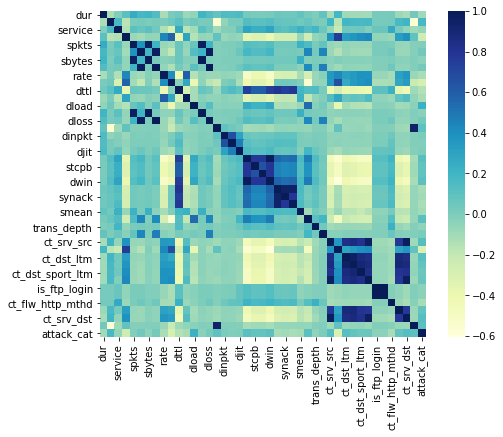

In [13]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(method = 'pearson'), square= True, cmap="YlGnBu")
plt.show()

In [14]:
corr_matrix = ds.corr()
corr_to_target = corr_matrix['attack_cat'].sort_values(ascending=False)
print(corr_to_target)

attack_cat           1.000000
dload                0.225681
proto                0.174490
ct_srv_src           0.133634
ct_srv_dst           0.129696
ct_dst_ltm           0.127281
swin                 0.116306
dmean                0.109198
dwin                 0.108099
is_sm_ips_ports      0.107282
sinpkt               0.099613
stcpb                0.087037
ct_src_dport_ltm     0.085136
ct_src_ltm           0.084740
dtcpb                0.084535
ct_dst_src_ltm       0.070692
ct_dst_sport_ltm     0.064751
dpkts                0.035163
dloss                0.027306
dbytes               0.021859
dinpkt               0.006612
response_body_len    0.003198
djit                 0.001956
spkts               -0.008428
sjit                -0.008554
sloss               -0.031339
sbytes              -0.040022
ct_ftp_cmd          -0.040575
is_ftp_login        -0.040575
trans_depth         -0.047626
service             -0.056009
synack              -0.092131
dur                 -0.097825
smean     

In [15]:
ds.shape

(175341, 43)

In [16]:
columnNames = ds.columns.values
for name in columnNames:
    if(corr_to_target[name] < 0.1 and corr_to_target[name] > -0.1):
        ds.drop(columns = name, inplace = True)

In [17]:
ds.shape

(175341, 20)

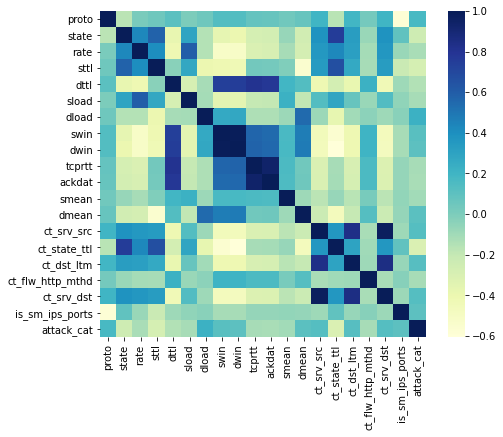

In [18]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(method = 'pearson'), square= True, cmap="YlGnBu")
plt.show()

In [19]:
check_corr = corr_matrix['dttl'].sort_values(ascending=False)
#check_corr

In [20]:
columnNames = ds.columns.values
for name in columnNames:
    if(check_corr[name] > 0.65 or check_corr[name] <-0.65):
        ds.drop(columns = name, inplace = True)

In [21]:
check_corr = corr_matrix['swin'].sort_values(ascending=False)
#check_corr

In [22]:
columnNames = ds.columns.values
for name in columnNames:
    if(check_corr[name] > 0.65 or check_corr[name] <-0.65):
        ds.drop(columns = name, inplace = True)

In [23]:
check_corr = corr_matrix['ct_srv_src'].sort_values(ascending=False)
#check_corr

In [24]:
columnNames = ds.columns.values
for name in columnNames:
    if(check_corr[name] > 0.65 or check_corr[name] <-0.65):
        ds.drop(columns = name, inplace = True)

In [25]:
check_corr = corr_matrix['state'].sort_values(ascending=False)
check_corr

state                1.000000
ct_state_ttl         0.759825
sttl                 0.584697
rate                 0.432307
ct_dst_src_ltm       0.429906
ct_dst_sport_ltm     0.408662
ct_srv_dst           0.387446
ct_srv_src           0.385515
ct_src_dport_ltm     0.372309
ct_dst_ltm           0.328748
ct_src_ltm           0.323019
sload                0.292570
dur                  0.103443
sinpkt               0.095492
is_sm_ips_ports      0.094198
response_body_len   -0.025541
sjit                -0.045441
sbytes              -0.049300
is_ftp_login        -0.051970
ct_ftp_cmd          -0.051970
trans_depth         -0.056128
dbytes              -0.059759
sloss               -0.060125
djit                -0.064747
smean               -0.070796
dloss               -0.071056
dinpkt              -0.076235
spkts               -0.078701
ct_flw_http_mthd    -0.078856
dpkts               -0.098268
service             -0.144978
dload               -0.150501
proto               -0.172441
attack_cat

In [26]:
columnNames = ds.columns.values
for name in columnNames:
    if(check_corr[name] > 0.65 or check_corr[name] <-0.65):
        ds.drop(columns = name, inplace = True)

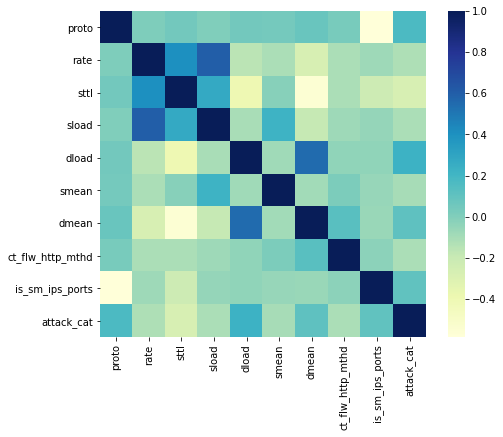

In [27]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(method = 'pearson'), square= True, cmap="YlGnBu")
plt.show()

In [28]:
ds.shape

(175341, 10)

# Visualize the Data

(-1.1095978359249108,
 1.1060804304931926,
 -1.1281172238311385,
 1.1013389154422457)

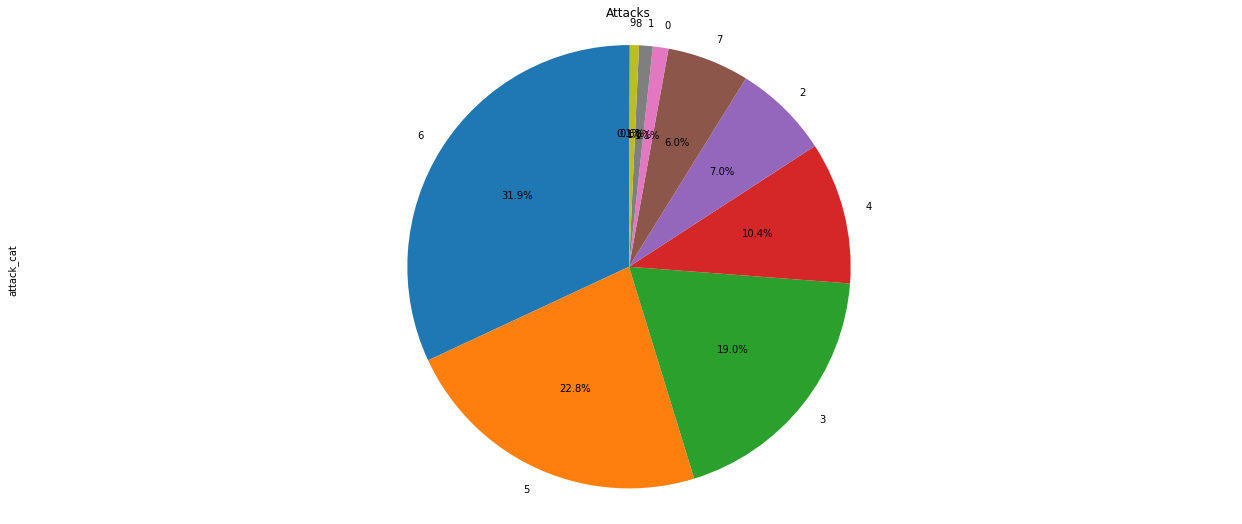

In [29]:
plt.figure(figsize = (100,20))
plot_params1 = {'kind':'pie', 'startangle': 90, 'autopct':'%1.1f%%'}

plt.subplot2grid((2,4), (0,0))
ds.attack_cat.value_counts() \
.plot(title='Attacks', **plot_params1).axis('equal')

# Preprocessing

In [30]:
columnNames = ds.columns.values
for name in columnNames:
  skewed= ds[name].skew()
  print(name, skewed)

proto -3.5779875353944783
rate 3.3194945898084494
sttl -0.6781092365887204
sload 8.703398789576552
dload 4.691217092888466
smean 3.72662255685938
dmean 2.8261458622156623
ct_flw_http_mthd 23.451424399654755
is_sm_ips_ports 7.778199328704083
attack_cat -0.541630022459375


In [31]:
preds = ds.copy()

In [32]:
print(preds['sload'])
preds['sload'] = np.sqrt(preds['sload'])
print(preds['sload'])
preds['sload'].skew()

0         1.415894e+04
1         8.395112e+03
2         1.572272e+03
3         2.740179e+03
4         8.561499e+03
              ...     
175336    5.066666e+07
175337    8.826286e+03
175338    5.066666e+07
175339    5.066666e+07
175340    5.066666e+07
Name: sload, Length: 175341, dtype: float64
0          118.991354
1           91.624845
2           39.651883
3           52.346719
4           92.528369
             ...     
175336    7118.051981
175337      93.948316
175338    7118.051981
175339    7118.051981
175340    7118.051981
Name: sload, Length: 175341, dtype: float64


1.9271885128948123

In [33]:
print(preds['ct_flw_http_mthd'])
preds['ct_flw_http_mthd'] = np.sqrt(preds['ct_flw_http_mthd'])
print(preds['ct_flw_http_mthd'])
preds['ct_flw_http_mthd'].skew()

0         0
1         0
2         0
3         0
4         0
         ..
175336    0
175337    0
175338    0
175339    0
175340    0
Name: ct_flw_http_mthd, Length: 175341, dtype: int64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
175336    0.0
175337    0.0
175338    0.0
175339    0.0
175340    0.0
Name: ct_flw_http_mthd, Length: 175341, dtype: float64


3.9978567182335225

In [34]:
preds['attack_cat'].value_counts()

6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: attack_cat, dtype: int64

In [35]:
preds.to_csv('modified.csv')

# First learning

In [36]:
first_ds = pd.read_csv("/content/Reduced.csv")

In [37]:
X = first_ds.iloc[:,:-1].values
y = first_ds.iloc[:, -1].values

In [38]:
X[1]

array([1.00000000e+00, 1.13000000e+02, 7.84733720e+01, 6.20000000e+01,
       9.16248455e+01, 5.03571312e+05, 5.20000000e+01, 1.10600000e+03,
       0.00000000e+00, 0.00000000e+00])

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X[1]

array([-1.73202117,  0.15180939, -0.57634475, -1.1419013 , -0.76351061,
       -0.06923301, -0.41407614,  3.80086949, -0.31636139, -0.12650796])

In [41]:
tl = TomekLinks(sampling_strategy='majority')
x_rus, y_rus = tl.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
print(x_rus.shape)
print(X.shape)

(174992, 10)
(175341, 10)


In [43]:
## Splitting the data 
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=32)
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Label Propagation (Semi)

In [44]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.9, random_state=32)
for train_index, test_index in sss.split(x_rus,y_rus):
    X_strain, X_stest = x_rus[train_index], x_rus[test_index]
    y_strain, y_stest = y_rus[train_index], y_rus[test_index]

In [45]:
from sklearn.semi_supervised import LabelSpreading

In [46]:
semi = LabelSpreading(kernel='rbf', max_iter=20, n_jobs = 4)

In [47]:
semi.fit(X_strain, y_strain)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=20, n_jobs=4,
               n_neighbors=7, tol=0.001)

In [48]:
y_pred = semi.predict(X_test)

In [49]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.06      0.10      1503
           2       0.35      0.19      0.24      3679
           3       0.60      0.79      0.68     10018
           4       0.52      0.69      0.60      5455
           5       0.93      0.98      0.96     12000
           6       0.94      0.93      0.94     16800
           7       0.71      0.13      0.22      3148

    accuracy                           0.77     52603
   macro avg       0.62      0.54      0.53     52603
weighted avg       0.76      0.77      0.74     52603



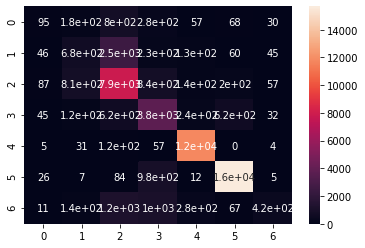

In [50]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

# Second Learning

In [51]:
second_ds = pd.read_csv("/content/limited.csv")

In [52]:
X = second_ds.iloc[:,:-1].values
y = second_ds.iloc[:, -1].values

In [53]:
X[1]

array([4.79120000e+04, 5.30000000e+01, 1.11111107e+05, 2.54000000e+02,
       9.42809037e+03, 0.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
X[1]

array([-1.39140357, -1.59689602, -0.11142329,  0.37176171,  0.1889884 ,
       -0.11598206, -0.10141005, -0.32307129, -0.33352652,  0.        ])

In [56]:
tl = TomekLinks(sampling_strategy='majority')
x_rus, y_rus = tl.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [57]:
print(x_rus.shape)
print(X.shape)

(4467, 10)
(5009, 10)


In [58]:
## Splitting the data 
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=32)
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Label Propagation (Semi)

In [59]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.9, random_state=32)
for train_index, test_index in sss.split(x_rus,y_rus):
    X_strain, X_stest = x_rus[train_index], x_rus[test_index]
    y_strain, y_stest = y_rus[train_index], y_rus[test_index]

In [60]:
from sklearn.semi_supervised import LabelSpreading

In [61]:
semi = LabelSpreading(kernel='rbf', max_iter=20, n_jobs = 4)

In [62]:
semi.fit(X_train, y_train)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=20, n_jobs=4,
               n_neighbors=7, tol=0.001)

In [63]:
y_pred = semi.predict(X_test)

In [64]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       600
           1       0.49      0.42      0.45       524
           8       0.85      0.82      0.84       340
           9       0.89      0.79      0.84        39

    accuracy                           0.61      1503
   macro avg       0.70      0.67      0.68      1503
weighted avg       0.61      0.61      0.61      1503



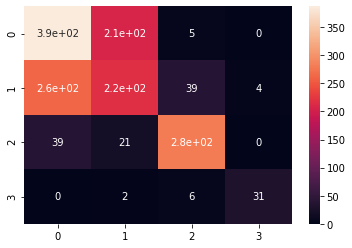

In [65]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)